Bibliotecas

In [65]:
import sympy as sp
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from sympy.printing import latex

Simbolos do sympy

In [66]:
t, g, l, m, k = sp.symbols('t g l m k')

theta = sp.symbols(r'theta', cls=sp.Function)
theta = theta(t)
theta_dot = sp.diff(theta, t)
theta_ddot = sp.diff(theta_dot, t)

u = sp.symbols(r'u', cls=sp.Function)
u = u(t)
u_dot = sp.diff(u, t)
u_ddot = sp.diff(u_dot, t)

Equações 'x' e 'y'

In [67]:
x = (l+u)*sp.sin(theta)
y = -(l+u)*sp.cos(theta)

Equação energia cinética

In [68]:
T1 = sp.Rational(1,2)*m*(sp.diff(x, t)**2 + sp.diff(y, t)**2)

T = T1

T

m*((-(-l - u(t))*sin(theta(t))*Derivative(theta(t), t) - cos(theta(t))*Derivative(u(t), t))**2 + ((l + u(t))*cos(theta(t))*Derivative(theta(t), t) + sin(theta(t))*Derivative(u(t), t))**2)/2

Equação energia potencial

In [69]:
U1 = y*m*g
U2 = sp.Rational(1,2)*k*(u**2)

U = U1 + U2

U

g*m*(-l - u(t))*cos(theta(t)) + k*u(t)**2/2

Lagrangeano

In [70]:
L = T - U

L

-g*m*(-l - u(t))*cos(theta(t)) - k*u(t)**2/2 + m*((-(-l - u(t))*sin(theta(t))*Derivative(theta(t), t) - cos(theta(t))*Derivative(u(t), t))**2 + ((l + u(t))*cos(theta(t))*Derivative(theta(t), t) + sin(theta(t))*Derivative(u(t), t))**2)/2

EDO theta(t)

In [71]:
eq = sp.diff(L, theta) - sp.diff(sp.diff(L, theta_dot), t)
EDO1 = sp.simplify(eq)

EDO1

-m*(g*l*sin(theta(t)) + g*u(t)*sin(theta(t)) + l**2*Derivative(theta(t), (t, 2)) + 2*l*u(t)*Derivative(theta(t), (t, 2)) + 2*l*Derivative(theta(t), t)*Derivative(u(t), t) + u(t)**2*Derivative(theta(t), (t, 2)) + 2*u(t)*Derivative(theta(t), t)*Derivative(u(t), t))

EDO u(t)

In [72]:
eq2 = sp.diff(L, u) - sp.diff(sp.diff(L, u_dot), t)
EDO2 = sp.simplify(eq2)

EDO2

g*m*cos(theta(t)) - k*u(t) + l*m*Derivative(theta(t), t)**2 + m*u(t)*Derivative(theta(t), t)**2 - m*Derivative(u(t), (t, 2))

Solução das EDO

In [73]:
sols = sp.solve([EDO1, EDO2], [theta_ddot, u_ddot], simplify=False, rational=False)

sols

{Derivative(theta(t), (t, 2)): -g*sin(theta(t))/(l + u(t)) - 2*Derivative(theta(t), t)*Derivative(u(t), t)/(l + u(t)),
 Derivative(u(t), (t, 2)): g*cos(theta(t)) - k*u(t)/m + l*Derivative(theta(t), t)**2 + u(t)*Derivative(theta(t), t)**2}

In [74]:
dz1dt_f = sp.lambdify((theta, theta_dot, u, u_dot, g, l, m, k), sols[theta_ddot])
dz2dt_f = sp.lambdify((theta, theta_dot, u, u_dot, g, l, m, k), sols[u_ddot])
dthetadt_f = sp.lambdify(theta_dot, theta_dot)
dudt_f = sp.lambdify(u_dot, u_dot)

In [75]:
def dSdt(S, t, g, l, m, k):
    theta, z1, u, z2 = S
    return [dthetadt_f(z1),
            dz1dt_f(theta, z1, u, z2, g, l, m, k),
            dudt_f(z2),
            dz2dt_f(theta, z1, u, z2, g, l, m, k)]

In [76]:
t = np.linspace(0, 10, 1000)
g = 9.81
l = 1
m = 1
k = 24
deg = 30
theta0 = deg*np.pi/180
dtheta0 = -1
u0 = 0
du0 = 2

sol = odeint(dSdt, y0 =[theta0, dtheta0, u0, du0], t=t, args=(g, l, m, k))

In [77]:
the = sol.T[0]
upos = sol.T[2]
thedot = sol.T[1]
uposdot = sol.T[3]

In [78]:
def pos(t, the1, u1, l):
    x1 = (l+u1)*np.sin(the1)
    y1 = -(l+u1)*np.cos(the1)
    return [
        x1, y1
    ]


x11, y11 = pos(t, the, upos, l)


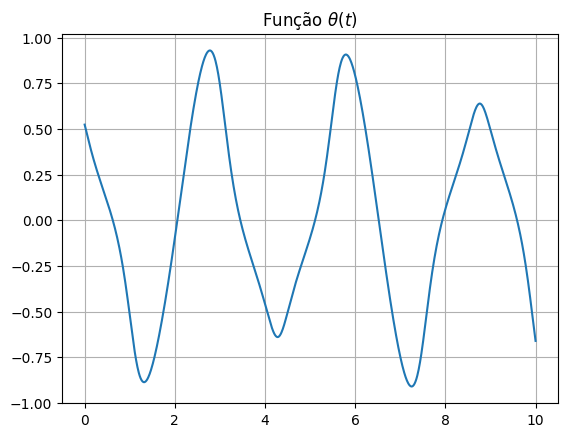

In [79]:
plt.title(f'Função ${latex(theta)}$')
plt.plot(t, the)
plt.grid()
plt.show()

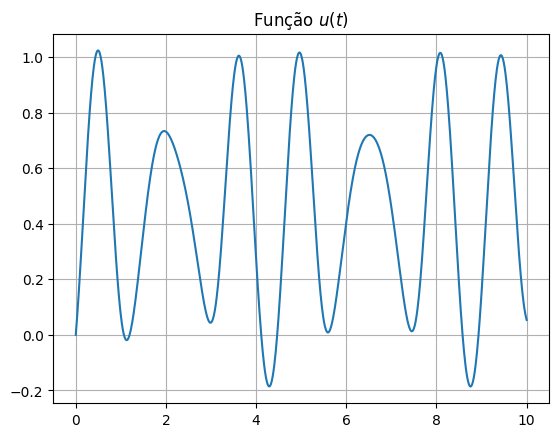

In [80]:
plt.title(f'Função ${latex(u)}$')
plt.plot(t, upos)
plt.grid()
plt.show()

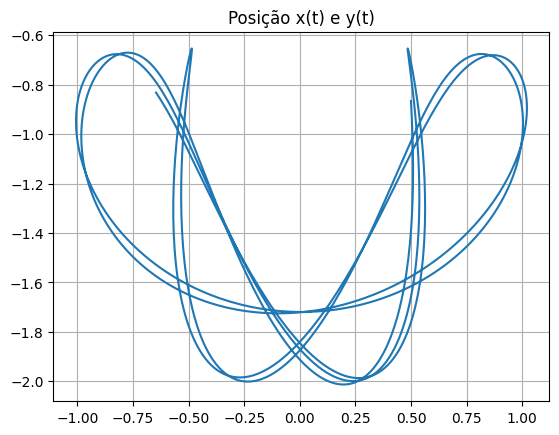

In [81]:
plt.title(f'Posição x(t) e y(t)')
plt.plot(x11, y11)
plt.grid()
plt.show()

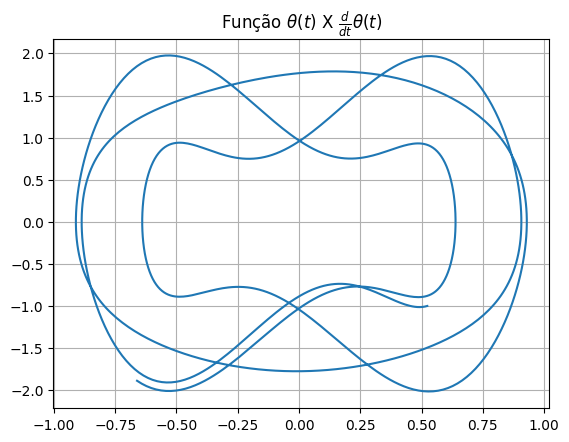

In [82]:
plt.title(f'Função ${latex(theta)}$ X ${latex(theta_dot)}$')
plt.plot(the, thedot)
plt.grid()
plt.show()

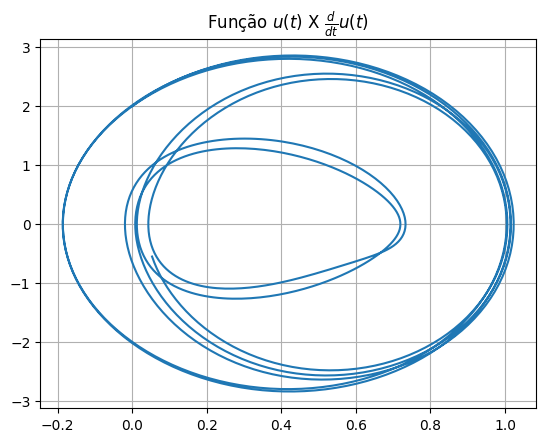

In [83]:
plt.title(f'Função ${latex(u)}$ X ${latex(u_dot)}$')
plt.plot(upos, uposdot)
plt.grid()
plt.show()

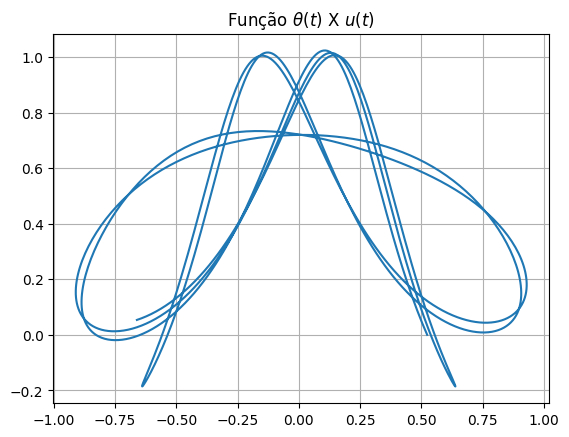

In [84]:
plt.title(f'Função ${latex(theta)}$ X ${latex(u)}$')
plt.plot(the, upos)
plt.grid()
plt.show()

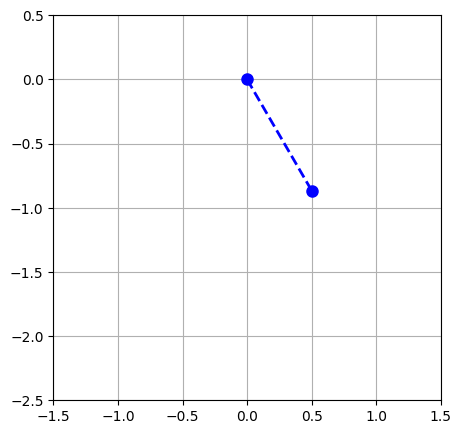

In [85]:
def animate(i):
    ln.set_data([0, x11[i]], [0, y11[i]])
    cur.set_data(x11[:i+1], y11[:i+1])

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-2.5, 0.5)
ax.grid()
ln, = ax.plot([], [], 'bo--', lw=2, markersize=8)
cur, = ax.plot(x11[0], y11[0], 'black', lw=1)

ani = animation.FuncAnimation(fig, animate, frames=1000, interval=30)
ani.save('pendulo.gif', writer='pillow', fps=25)